Cài đặt thư viện

In [1]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium

!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 16.7 MB 174 kB/s 
     |████████████████████████████████| 6.3 MB 38.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Git clone

In [2]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1957, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 1957 (delta 7), reused 1 (delta 1), pack-reused 1911
Receiving objects: 100% (1957/1957), 175.52 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (1064/1064), done.
Checking out files: 100% (542/542), done.


In [3]:
import matplotlib.pyplot as plt
import osmnet
import folium

import geopandas as gpd
import pygeos
import geojson
import rtree

Load data

In [4]:
data = gpd.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
data

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


In [18]:
data = data.to_crs(epsg=4326)
print(data.crs)
data.head()

epsg:4326


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,MatDo2009,MatDo2019,MatDoTang,MatDo2017
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795...",0.023361,0.018487,0.675244,0.027378
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792...",0.038689,0.038653,0.956202,0.040424
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752...",0.043310,0.041958,0.953424,0.044008
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735...",0.034915,0.032707,0.888886,0.036796
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758...",0.006929,0.010217,1.100641,0.009282


Load dữ liệu click của người dùng

In [13]:
!git clone https://github.com/hongha0111/Python-for-ML

Cloning into 'Python-for-ML'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [14]:
click_file = gpd.read_file('click_data.json')
click_file

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
...,...,...
83670,1,POINT (106.65664 10.84339)
83671,1,POINT (106.75180 10.85276)
83672,1,POINT (106.73189 10.73154)
83673,1,POINT (106.67640 10.82388)


Top 5 quận có tốc độ tăng mật độ dân số cao nhất

In [15]:
data['MatDo2017'] = data['Pop_2017']/data['Shape_Area']
data['MatDo2019'] = data['Pop_2019']/data['Shape_Area']

In [17]:
data['MatDoTang'] = data['MatDo2019']/data['MatDo2017']

top5 = data.nlargest(5, 'MatDoTang')
top5

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,MatDo2009,MatDo2019,MatDoTang,MatDo2017
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",0.002243,0.003474,1.277619,0.002719
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",0.003197,0.004967,1.215639,0.004086
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",0.001006,0.002058,1.162071,0.001771
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",0.007681,0.011751,1.129460,0.010404
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",0.002953,0.003610,1.113104,0.003243


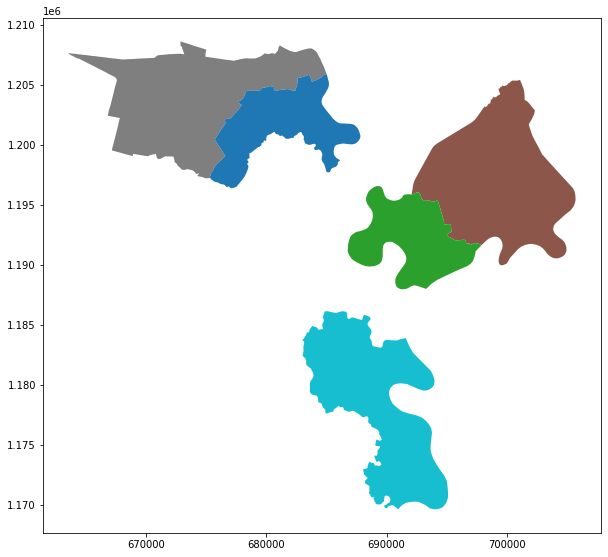

In [36]:

top5.plot(top5['Dist_Name'],figsize=(10, 10))
plt.show()

In [31]:
top5.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
top5 = top5.to_crs(epsg=32648)
print(top5.crs)
top5.head()

epsg:32648


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,MatDo2009,MatDo2019,MatDoTang,MatDo2017
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",0.002243,0.003474,1.277619,0.002719
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",0.003197,0.004967,1.215639,0.004086
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",0.001006,0.002058,1.162071,0.001771
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",0.007681,0.011751,1.129460,0.010404
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",0.002953,0.003610,1.113104,0.003243


In [38]:
from geopandas.tools import sjoin
click_file.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
top5 = top5.to_crs(4326)
top5.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,MatDo2009,MatDo2019,MatDoTang,MatDo2017
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((106.84015 10.89893, 106.84048 10.897...",0.002243,0.003474,1.277619,0.002719
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((106.58361 10.92869, 106.58391 10.928...",0.003197,0.004967,1.215639,0.004086
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((106.72315 10.72162, 106.72428 10.721...",0.001006,0.002058,1.162071,0.001771
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((106.69433 10.89842, 106.69446 10.897...",0.007681,0.011751,1.129460,0.010404
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((106.74241 10.80855, 106.74442 10.808...",0.002953,0.003610,1.113104,0.003243


In [42]:
click_top5 = sjoin(click_file, top5, how='left', op='within')
click_top5 = click_top5.dropna()
click_top5

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,MatDo2009,MatDo2019,MatDoTang,MatDo2017
126,1,POINT (106.57481 10.90807),23.0,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,0.003197,0.004967,1.215639,0.004086
222,1,POINT (106.76471 10.82926),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,0.002243,0.003474,1.277619,0.002719
283,1,POINT (106.76238 10.59443),18.0,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,...,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,0.001006,0.002058,1.162071,0.001771
342,1,POINT (106.68818 10.85636),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,0.007681,0.011751,1.129460,0.010404
368,1,POINT (106.71118 10.85242),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,0.007681,0.011751,1.129460,0.010404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83292,1,POINT (106.71130 10.85206),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,0.007681,0.011751,1.129460,0.010404
83372,1,POINT (106.76182 10.82430),16.0,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,0.002243,0.003474,1.277619,0.002719
83394,1,POINT (106.72823 10.78867),17.0,District 2,769,District,147490.0,140621.0,137749.0,134131.0,...,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,0.002953,0.003610,1.113104,0.003243
83466,1,POINT (106.71118 10.86631),22.0,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,0.007681,0.011751,1.129460,0.010404


In [44]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
def kmeans(df, par1, par2='geometry', n_clusters= 20):
  table = df[df.Dist_Name == par1]
  kmeans = KMeans(n_clusters)
  x = pd.Series(table[par2].apply(lambda p: p.x))
  y = pd.Series(table[par2].apply(lambda p: p.y))
  point = np.column_stack((x,y))
  y_means = kmeans.fit_predict(point)
  table['cluster'] = y_means
  return table


In [46]:
district_1 = kmeans(click_top5, 'District 9')
district_2 = kmeans(click_top5, 'Hoc Mon')
district_3 = kmeans(click_top5, 'Nha Be')
district_4 = kmeans(click_top5, 'District 12')
district_5 = kmeans(click_top5, 'District 2')

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [47]:
print(district_1)

       dbh                    geometry  index_right   Dist_Name Dist_ID  \
222      1  POINT (106.76471 10.82926)         16.0  District 9     763   
429      1  POINT (106.79251 10.78538)         16.0  District 9     763   
1316     1  POINT (106.81852 10.78415)         16.0  District 9     763   
1381     1  POINT (106.76463 10.82930)         16.0  District 9     763   
2129     1  POINT (106.81964 10.78909)         16.0  District 9     763   
...    ...                         ...          ...         ...     ...   
81983    1  POINT (106.84658 10.87865)         16.0  District 9     763   
82069    1  POINT (106.78265 10.82731)         16.0  District 9     763   
82657    1  POINT (106.80625 10.84451)         16.0  District 9     763   
83095    1  POINT (106.83235 10.84348)         16.0  District 9     763   
83372    1  POINT (106.76182 10.82430)         16.0  District 9     763   

          Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2016  \
222    District  256257.0

In [48]:
idx1 = district_1['cluster'].value_counts().idxmax()
idx2 = district_2['cluster'].value_counts().idxmax()
idx3 = district_3['cluster'].value_counts().idxmax()
idx4 = district_4['cluster'].value_counts().idxmax()
idx5 = district_5['cluster'].value_counts().idxmax()
cluster_data = dict()
cluster_data['District 9'] = district_1.where(district_1['cluster'] == idx1).dropna()
cluster_data['Hoc Mon'] = district_1.where(district_1['cluster'] == idx2).dropna()
cluster_data['Nha Be'] = district_1.where(district_1['cluster'] == idx3).dropna()
cluster_data['District 12'] = district_1.where(district_1['cluster'] == idx4).dropna()
cluster_data['District 2'] = district_1.where(district_1['cluster'] == idx5).dropna()

In [50]:
data = []

for clu in cluster_data.values():
  x = pd.Series(clu['geometry'].apply(lambda p: p.x))
  y = pd.Series(clu['geometry'].apply(lambda p: p.y))

  point = np.column_stack((y,x))
  data = data + point.tolist()
color = ['red', 'green', 'blue', 'orange', 'yellow']
import random
from glob import glob
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map([10.8, 106.7], titles='CartoDB positron', zoom_start=10)
HeatMap(data).add_to(map);

for _, r in top5.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': color[random.randint(0,4)]})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(map)

In [53]:

HeatMap(data).add_to(map);
map


In [54]:
!apt-get update 
!apt install chromium-chromedriver
!pip install selenium
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [950 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:14 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


In [55]:
import os

In [56]:
map_path='MAP.html'
map.save(map_path)
map_URL='file://{path}/{mapfile}'.format(path=os.getcwd(), mapfile=map_path)

driver.get(map_URL)

driver.save_screenshot('map.png')
driver.quit()